In [146]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

## Линал Deep Learning school

## Essence of linear algebra

Source: https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab

### 1. Векторы, что это такое?
https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=1&t=263s&ab_channel=3Blue1Brown

1 - сумма двух векторов 

2 - умножение вектора на скаляр

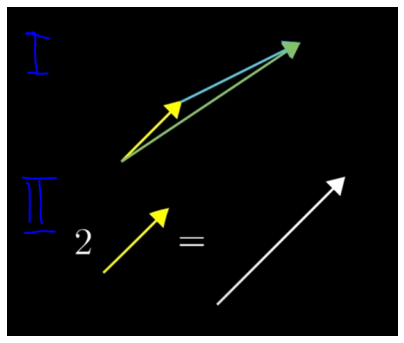

In [12]:
plt.figure(figsize=(7,7))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/Vectors.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

### 2. Линейная комбинация векторов, размерность и базис
https://www.youtube.com/watch?v=k7RM-ot2NWY&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=2&ab_channel=3Blue1Brown

i, j - базсные (единичные) вектора

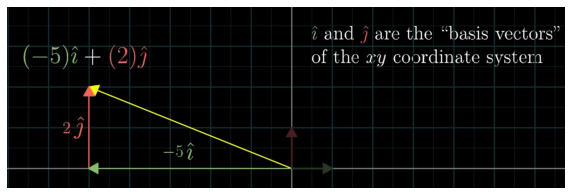

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/basis.png"), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Линейная комбинация двух векторов

Линейная потому что, если зафиксировать один из скаляров как константу, а другую константу изменять, то мы нарисуем прямую линию

Если изменять обе константы, то мы сможем достичь любой вектор в пространстве (если два вектора не параллельны друг другу)

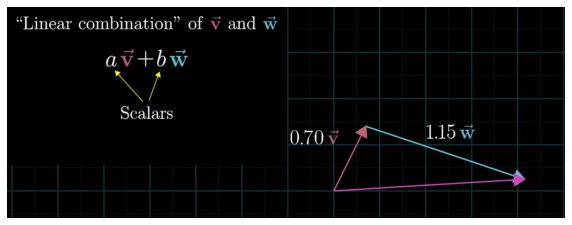

In [14]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/Linear_combination.png"), cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Linear transformations and matrices
https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3&ab_channel=3Blue1Brown

При линейной трансформации:

    - Все прямые линии должны отставаться прямыми линиями
    
    - Ориджин должен сохранять свое положение в простравнстве (быть фиксированым)
    
    - Грид лайны должны оставаться параллельными и находиться на равном расстоянии друг от друга

Матрица преобразования показывает как изменился базис (обычно отностиельно единичного), а с изменением базиса, соответсвенно, изменились и всевозможные вектора пространства

In [111]:
cx, cy = 0, 0 
i, j = 1, 1

di = np.array([0, 1]).reshape(2,1)
dj = np.array([-1, 0]).reshape(2,1)

v_x, v_y = 2, 3

v_tf = v_x*di + v_y*dj

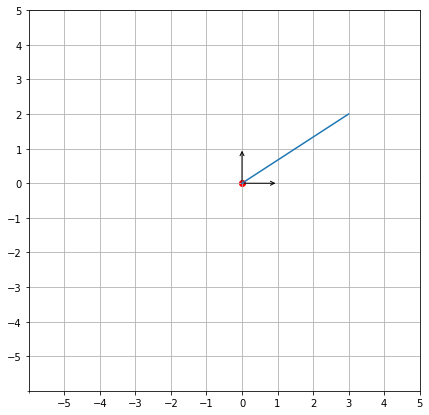

In [104]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(cx,cy, color="r")
ax.annotate("", xytext=(cx, cy), xy=(1, 0), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(cx, cy), xy=(0, 1), arrowprops=dict(arrowstyle="->"))
plt.plot((0,v_y), (0,v_x))

major_ticks = np.arange(-5, 6, 1)
minor_ticks = np.arange(-6, 6, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid()
plt.show()

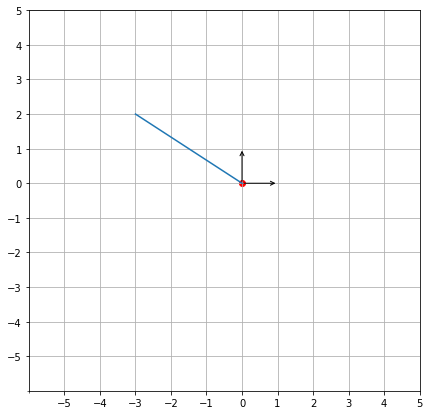

In [115]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1, 1, 1)

ax.scatter(cx,cy, color="r")
ax.annotate("", xytext=(cx, cy), xy=(1, 0), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(cx, cy), xy=(0, 1), arrowprops=dict(arrowstyle="->"))
plt.plot((0,v_tf[0]), (0,v_tf[1]))

major_ticks = np.arange(-5, 6, 1)
minor_ticks = np.arange(-6, 6, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

ax.grid()
plt.show()

## Statistic

### Общие термины

- Генеральная совокупность - Это все множество объектов, которое подходит под данный эксперимент (Опрос жителей Санкт-Петербурга, ГС - все жители Санкт-Петербурга);
- Выборка - Часть множества из генеральной совокупности (нам не всегда нужно использовать всю ГС или иногда это просто невозможно).

### Формирование репрезентативной выборки

- Случайная - рандомно сэмплируем;
- Стратифицированная - разделяем на кластеры, случайно сэмплируем из каждого кластера;
- Групповая (кластрерная) - разделяем на кластеры, которые похожи между собой (Город, Кластеры: районы), затем выбираем кластеры из которых будем сэмплировать, рандомно сэмплируем из этих кластеров.

### Типы переменных

1. Количественные:
    - Непрерывные (рост)
    - Дискретные (кол-во детей)
2. Качественные (пол Ж-0, М-1)
3. Ранговые (ранг по возрасту: 1-самый взрослый, 2-менее взрослый и т.д.)

Количественные - измеренные значения признака

Качественные - используемые для кластеризации

### Мера центральный тенденции

Общие понятия:

- Мода - значение измеряемого признака, которое встречается чаще всех;
- Медиана - середина отстортированных значений измеряемого признака
- Среднее значение (могут быть проблемы с выбросами)

In [201]:
array = np.random.randint(0,10,20) 
print(array)

# Мода
array_unique, freq = np.unique(array, return_counts=True)
print("Mode:", array_unique[freq.argmax()], stats.mode(array))


# Медиана
array_sort = np.sort(array)
middle_ind = array_sort.shape[0]//2
if array_sort.shape[0] % 2: median = array_sort[middle_ind]
else: median = (array_sort[middle_ind] + array_sort[middle_ind-1]) / 2 
print("Median: ", median, np.median(array))

[7 1 2 0 5 1 2 6 2 0 2 3 4 2 8 0 7 8 8 5]
Mode: 2 ModeResult(mode=array([2]), count=array([5]))
Median:  2.5 2.5


### Меры изменчивости

- Размах - разница между max и min значением выборки (могу быть проблемы с выбросами)
- Дисперсия - средний квадрат отклонений индивидуальных значений от средней величины
- Среднеквадратичное отклонение (Сигма) - корень из дисперсии

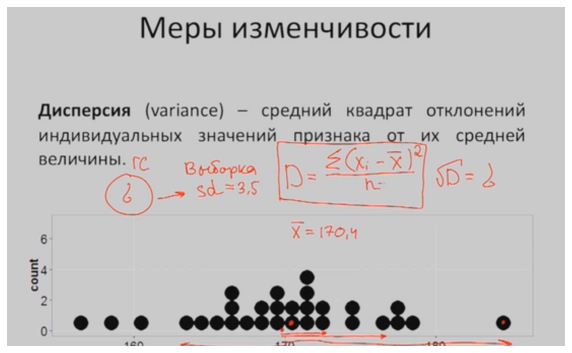

In [213]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/mery_izmenchivosti.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

In [237]:
array = np.array([1, 5, 2, 7, 1, 9, 3, 8, 5, 9])
array_mean = np.mean(array)

D = np.sum((array - array_mean)**2) / (array.shape[0] - 1)
sigma = np.sqrt(D)
D, sigma

(10.0, 3.1622776601683795)

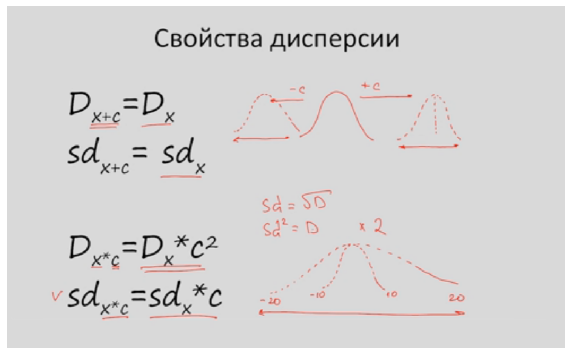

In [245]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/svoystva_dispersii.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

### Квартили распределения и график box-plot

- Квартили - это три точки, которые делять упорядоченое множество данных на 4 равные части

### Стандартизация распределения

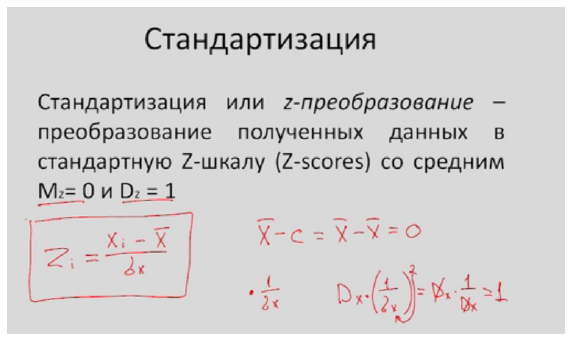

In [246]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/standardization.png"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

### Задачи на нормальное распредление

Task 1

Допустим, что некоторый признак распределен нормально, выборочное среднее равняется 100, а дисперсия равняется 25 (M = 100, D = 25). Тогда приблизительно 95% всех наблюдений находится в диапазоне

In [251]:
# Task 1
M = 100
D = 25

# При нормальном распределении примерно 95% всех наблюдений будет находиться в пределах 2-х сигм
sd = np.sqrt(D)
result = (M-2*sd, M+2*sd)
result

(90.0, 110.0)

Task 2

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).

Какой приблизительно процент людей обладает IQ > 125?

In [254]:
# Task 2
M = 100
sd = 15

# Переводим в z преобразование
z_i = (125-M)/sd

#Смотрим по таблице
#  https://web.archive.org/web/20180729102938/http://users.stat.ufl.edu/~athienit/Tables/Ztable.pdf
result = (1 - 0.9452) * 100
result

5.479999999999996

Task 3

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).

Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112 

In [259]:
z_i = (70-M)/sd
z_j = (112-M)/sd
print(z_i, z_j)

((1 - 0.0228) * 100) - ((1 - 0.7881) * 100)

-2.0 0.8


76.53

### Центральная предельная теорема

Пусть есть признак, распределенный КАК  УГОДНО* с некоторым средним и некоторым стандартным отклонением. Тогда, если мы будем выбирать из этой совокупности выборки объема n, то их средние тоже будут распределены нормально со средним равным среднему признака в ГС и отклонением стандартным отклонением, se, формулу которого мы уже приводили в прошлых шагах.

'* определенные ограничения на распределение все-таки накладываются, например, распределение должно обладать конечной дисперсией, да и так бывает, бывают распределения, у которых дисперсия и вовсе не определена!

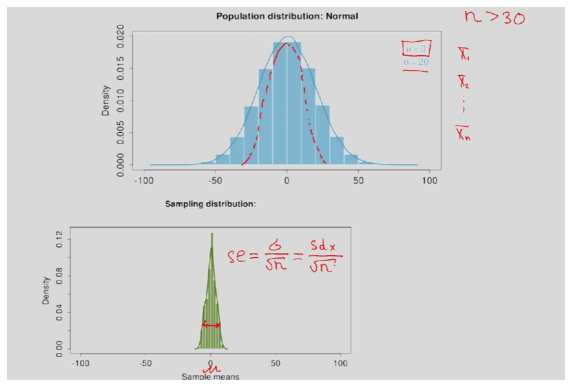

In [262]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/Central_limit_theorem.PNG"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()

### Задачи на центральную предельную теорему

Task 1

Рассчитайте стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100

In [267]:
# se = sd/srqt(n)

M = 10
D = 4
N = 100

se = np.sqrt(D) / np.sqrt(N)
print(se)

0.2


### Доверительные интервалы для среднего

Необходимо для того чтобы сделать выводы о генеральной совокупности основываясь только на выборочных данных

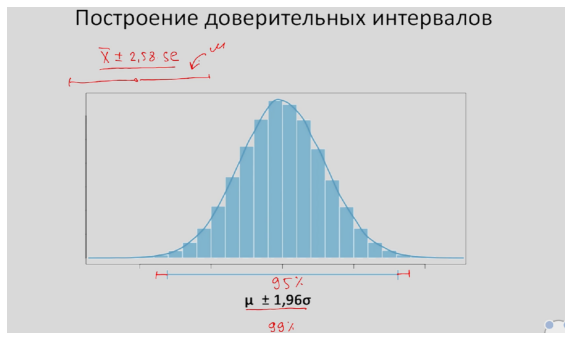

In [269]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(cv2.imread("./imgs/confidence_interval_for_mean.PNG"), cv2.COLOR_BGR2RGB))

plt.axis('off')
plt.show()